In [1]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [2]:
import numpy as np
import pandas as pd
train = pd.read_csv('UNSW_NB15_bayesian_enc_training_set.csv')
test = pd.read_csv('UNSW_NB15_bayesian_enc_testing_set.csv')

In [3]:
train

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto,service,state,label
0,1,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,...,0,0,0,1,1,0,0.455718,0.547930,0.476401,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,...,0,0,0,1,6,0,0.455718,0.547930,0.476401,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,...,0,0,0,2,6,0,0.455718,0.547930,0.476401,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,1,1,0,2,1,0,0.455718,0.603213,0.476401,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,...,0,0,0,2,39,0,0.455718,0.547930,0.476401,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,0,24,24,0,0.762473,0.846186,0.912400,1
175337,175338,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,...,0,0,0,1,1,0,0.455718,0.547930,0.476401,1
175338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,0,3,12,0,0.762473,0.846186,0.912400,1
175339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,0,30,30,0,0.762473,0.846186,0.912400,1


In [4]:
x1 = train.iloc[:,1:43]
y1 = train['label']
print(x1)
print(y1)

             dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0       0.121478      6      4     258     172      74.087490   252   254   
1       0.649902     14     38     734   42014      78.473372    62   252   
2       1.623129      8     16     364   13186      14.170161    62   252   
3       1.681642     12     12     628     770      13.677108    62   252   
4       0.449454     10      6     534     268      33.373826   254   252   
...          ...    ...    ...     ...     ...            ...   ...   ...   
175336  0.000009      2      0     114       0  111111.107200   254     0   
175337  0.505762     10      8     620     354      33.612649   254   252   
175338  0.000009      2      0     114       0  111111.107200   254     0   
175339  0.000009      2      0     114       0  111111.107200   254     0   
175340  0.000009      2      0     114       0  111111.107200   254     0   

               sload          dload  ...  ct_dst_src_ltm  is_ftp_login  \
0

In [5]:
x2 = test.iloc[:,1:43]
y2 = test['label']
print(x2)
print(y2)

            dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0      0.000011      2      0     496       0   90909.090200   254     0   
1      0.000008      2      0    1762       0  125000.000300   254     0   
2      0.000005      2      0    1068       0  200000.005100   254     0   
3      0.000006      2      0     900       0  166666.660800   254     0   
4      0.000010      2      0    2126       0  100000.002500   254     0   
...         ...    ...    ...     ...     ...            ...   ...   ...   
82327  0.000005      2      0     104       0  200000.005100   254     0   
82328  1.106101     20      8   18062     354      24.410067   254   252   
82329  0.000000      1      0      46       0       0.000000     0     0   
82330  0.000000      1      0      46       0       0.000000     0     0   
82331  0.000009      2      0     104       0  111111.107200   254     0   

              sload        dload  ...  ct_dst_src_ltm  is_ftp_login  \
0      1.803636e

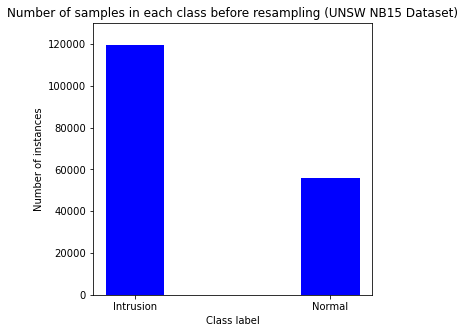

In [69]:
from matplotlib import pyplot as plt
data1 = {'Intrusion':119341, 'Normal':56000}
Class_label = list(data1.keys())
Number_of_instances = list(data1.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 130000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class before resampling (UNSW NB15 Dataset)")
plt.show()

In [7]:
# RESAMPLING

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_sample(x1, y1) 

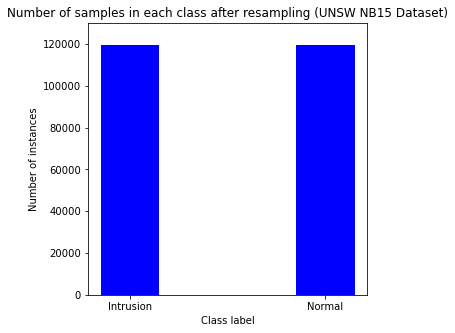

In [70]:
data2 = {'Intrusion':119341, 'Normal':119341}
Class_label = list(data2.keys())
Number_of_instances = list(data2.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 130000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class after resampling (UNSW NB15 Dataset)")
plt.show()

In [9]:
# NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
model.fit(x1)
x1 = model.transform(x1)
x2 = model.transform(x2)

In [10]:
# 1. AUTOENCODER BASED FEATURE EXTRACTION

n_inputs = x1.shape[1]
n_inputs = x2.shape[1]

In [11]:
input_data_shape = Input(shape=(n_inputs,))
encoder = Dense(n_inputs*3)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)
encoder = Dense(n_inputs)(encoder)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)
n_bottleneck = round(float(n_inputs)/3.0)
bottleneck = Dense(n_bottleneck)(encoder)
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
decoder = Dense(n_inputs*3)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [12]:
output = Dense(n_inputs,activation = 'relu')(decoder)
model_AE = Model(inputs = input_data_shape,outputs = output)
model_AE.compile(optimizer = 'adam',loss='mse')
model_AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42)]              0         
                                                                 
 dense (Dense)               (None, 126)               5418      
                                                                 
 batch_normalization (BatchN  (None, 126)              504       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 126)               0         
                                                                 
 dense_1 (Dense)             (None, 42)                5334      
                                                                 
 batch_normalization_1 (Batc  (None, 42)               168       
 hNormalization)                                             

In [13]:
history = model_AE.fit(x1,x1,epochs = 20,batch_size = 256,shuffle=True,verbose = 2,validation_data = (x2,x2))

Epoch 1/20
933/933 - 25s - loss: 0.0076 - val_loss: 0.0022 - 25s/epoch - 26ms/step
Epoch 2/20
933/933 - 10s - loss: 0.0020 - val_loss: 0.0017 - 10s/epoch - 11ms/step
Epoch 3/20
933/933 - 10s - loss: 0.0017 - val_loss: 0.0016 - 10s/epoch - 10ms/step
Epoch 4/20
933/933 - 10s - loss: 0.0015 - val_loss: 0.0013 - 10s/epoch - 10ms/step
Epoch 5/20
933/933 - 10s - loss: 0.0015 - val_loss: 0.0014 - 10s/epoch - 10ms/step
Epoch 6/20
933/933 - 8s - loss: 0.0014 - val_loss: 0.0013 - 8s/epoch - 9ms/step
Epoch 7/20
933/933 - 9s - loss: 0.0014 - val_loss: 0.0012 - 9s/epoch - 9ms/step
Epoch 8/20
933/933 - 6s - loss: 0.0013 - val_loss: 0.0013 - 6s/epoch - 7ms/step
Epoch 9/20
933/933 - 6s - loss: 0.0013 - val_loss: 0.0012 - 6s/epoch - 7ms/step
Epoch 10/20
933/933 - 10s - loss: 0.0013 - val_loss: 0.0012 - 10s/epoch - 10ms/step
Epoch 11/20
933/933 - 10s - loss: 0.0013 - val_loss: 0.0011 - 10s/epoch - 10ms/step
Epoch 12/20
933/933 - 10s - loss: 0.0013 - val_loss: 0.0012 - 10s/epoch - 10ms/step
Epoch 13/20
9

In [14]:
encoder = Model(inputs = input_data_shape,outputs = bottleneck)
encoder.save('AE_encoder.h5')

In [15]:
encoder = load_model('AE_encoder.h5')
x1_encode = encoder.predict(x1)
x2_encode = encoder.predict(x2)

In [16]:
x1_encode

array([[-1.05251122e+00,  4.66294497e-01, -1.22382104e+00, ...,
        -6.68272153e-02, -2.66582775e-03,  9.05818343e-02],
       [-1.22553873e+00,  3.02166414e+00,  1.57597661e-01, ...,
         1.01078525e-01,  1.95059329e-01,  1.16426384e+00],
       [-1.05528378e+00,  2.43076682e+00, -4.60718274e-01, ...,
         4.72090185e-01,  7.35385299e-01,  9.06608403e-01],
       ...,
       [ 3.27062756e-02,  1.73174763e+00, -1.67808700e+00, ...,
         1.11605322e+00, -1.83916032e-01,  1.87233377e+00],
       [-1.14613450e+00,  6.97476745e-01, -8.07948172e-01, ...,
        -4.96879891e-02, -1.95819545e+00,  2.16370559e+00],
       [-7.30830312e-01,  9.85149562e-01, -8.15093100e-01, ...,
         2.42853671e-01,  8.45102608e-01,  7.07902014e-01]], dtype=float32)

In [17]:
x2_encode

array([[-0.48629427,  0.46468872,  2.2175033 , ..., -2.737243  ,
        -0.31181723,  0.6340338 ],
       [-0.5230595 ,  0.28203452,  1.9879415 , ..., -3.6750865 ,
        -0.9308832 ,  0.5222928 ],
       [-0.5065994 ,  0.36955866,  2.1150897 , ..., -3.169413  ,
        -0.5511364 ,  0.5824991 ],
       ...,
       [ 3.389453  , 10.263091  , -1.1149046 , ...,  3.921506  ,
         1.9418211 ,  3.018292  ],
       [ 3.3894556 , 10.263092  , -1.1149067 , ...,  3.9215064 ,
         1.9418195 ,  3.0182931 ],
       [-0.4791587 ,  0.51487154,  2.310147  , ..., -2.437339  ,
        -0.14164008,  0.64842534]], dtype=float32)

In [18]:
x1_encode.shape

(238682, 14)

In [19]:
x2_encode.shape

(82332, 14)

In [20]:
recon_feat_train = pd.DataFrame(x1_encode, columns =['AE_0', 'AE_1','AE_2','AE_3','AE_4','AE_5','AE_6','AE_7','AE_8','AE_9',
                                       'AE_10','AE_11','AE_12','AE_13'])
recon_feat_train

,AE_0,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10,AE_11,AE_12,AE_13
0,-1.052511,0.466294,-1.223821,-1.387317,-0.397027,-2.004721,-0.444896,-1.105148,-0.595322,0.077704,-2.837607,-0.066827,-0.002666,0.090582
1,-1.225539,3.021664,0.157598,-0.378443,-1.160110,-1.863075,-0.489220,-2.451426,0.752282,-0.574933,-3.349719,0.101079,0.195059,1.164264
2,-1.055284,2.430767,-0.460718,-0.549432,-0.733250,-2.863697,-1.064098,-1.135437,0.738227,-0.501624,-3.243936,0.472090,0.735385,0.906608
3,-1.203059,1.354329,-0.759333,0.046270,-0.051222,-2.548516,-0.247424,-0.284332,0.348046,-0.756196,-2.371345,0.533712,0.710682,1.099651
4,-0.288074,0.613755,-0.737952,0.472382,-0.160398,-0.982402,-0.479971,-1.776617,0.939421,0.456160,-2.398485,-0.640333,1.599061,0.941346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238677,0.033348,2.059657,-1.418875,-1.251489,-0.537602,-2.064733,0.633260,0.162490,1.363486,0.915128,-2.178612,1.122589,-0.122969,1.447913
238678,-0.361637,2.163950,-1.757837,-1.235829,-0.072748,-1.522996,0.385133,0.385289,0.255396,0.585104,-3.889794,0.984024,-0.757660,1.781219
238679,0.032706,1.731748,-1.678087,-0.975371,-0.027420,-1.784032,0.809675,0.402301,0.661577,0.423551,-2.597864,1.116053,-0.183916,1.872334
238680,-1.146134,0.697477,-0.807948,-0.853448,-0.219640,-0.788358,-0.343273,0.150535,-0.133050,0.363441,0.475277,-0.049688,-1.958195,2.163706


In [21]:
recon_feat_test = pd.DataFrame(x2_encode, columns =['AE_0', 'AE_1','AE_2','AE_3','AE_4','AE_5','AE_6','AE_7','AE_8','AE_9',
                                       'AE_10','AE_11','AE_12','AE_13'])
recon_feat_test

,AE_0,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10,AE_11,AE_12,AE_13
0,-0.486294,0.464689,2.217503,-1.426615,-0.907634,0.388177,-0.429568,3.040187,-2.122316,1.241834,2.785593,-2.737243,-0.311817,0.634034
1,-0.523059,0.282035,1.987942,-1.444279,-0.928810,0.562707,-0.198910,3.213951,-1.773638,0.847240,2.319764,-3.675086,-0.930883,0.522293
2,-0.506599,0.369559,2.115090,-1.386224,-0.892751,0.489176,-0.315955,3.064881,-1.930388,1.069295,2.532985,-3.169413,-0.551136,0.582499
3,-0.438891,0.381318,2.154788,-1.398052,-0.891704,0.472763,-0.386183,3.053762,-1.955987,1.134957,2.579842,-3.037872,-0.508429,0.579314
4,-0.461998,0.201788,1.901662,-1.418206,-0.898399,0.641906,-0.151884,3.244070,-1.629740,0.748581,2.130332,-3.917210,-1.129762,0.485175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,-0.461397,0.459201,2.291028,-1.448246,-0.918821,0.304475,-0.524860,3.022112,-2.205353,1.389943,2.979818,-2.438741,-0.209967,0.625641
82328,-0.902345,1.022571,-1.494427,-1.052209,-0.693140,-2.277253,-0.337430,-0.441306,0.209212,0.058632,-3.300391,-1.274152,0.239817,-0.661283
82329,3.389453,10.263091,-1.114905,-3.464572,0.039777,-0.991940,3.466724,6.223500,0.208930,3.707958,-7.517637,3.921506,1.941821,3.018292
82330,3.389456,10.263092,-1.114907,-3.464572,0.039777,-0.991942,3.466723,6.223501,0.208930,3.707958,-7.517638,3.921506,1.941820,3.018293


In [22]:
x1_recon = recon_feat_train.iloc[:,:]
print(x1_recon)
x2_recon = recon_feat_test.iloc[:,:]
print(x2_recon)

            AE_0      AE_1      AE_2      AE_3      AE_4      AE_5      AE_6  \
0      -1.052511  0.466294 -1.223821 -1.387317 -0.397027 -2.004721 -0.444896   
1      -1.225539  3.021664  0.157598 -0.378443 -1.160110 -1.863075 -0.489220   
2      -1.055284  2.430767 -0.460718 -0.549432 -0.733250 -2.863697 -1.064098   
3      -1.203059  1.354329 -0.759333  0.046270 -0.051222 -2.548516 -0.247424   
4      -0.288074  0.613755 -0.737952  0.472382 -0.160398 -0.982402 -0.479971   
...          ...       ...       ...       ...       ...       ...       ...   
238677  0.033348  2.059657 -1.418875 -1.251489 -0.537602 -2.064733  0.633260   
238678 -0.361637  2.163950 -1.757837 -1.235829 -0.072748 -1.522996  0.385133   
238679  0.032706  1.731748 -1.678087 -0.975371 -0.027420 -1.784032  0.809675   
238680 -1.146134  0.697477 -0.807948 -0.853448 -0.219640 -0.788358 -0.343273   
238681 -0.730830  0.985150 -0.815093 -0.678269 -0.314293 -2.341517 -0.368177   

            AE_7      AE_8      AE_9   

In [23]:
# 2. XGBoost CLASSIFIER MODEL

from xgboost import XGBClassifier
import xgboost as xgb
params = {
             'objective':'binary:logistic',
            'max_depth': 4, 'min_child_weight': 12, 'gamma': 0.3, 'subsample': 0.6,
            'colsample_bytree': 0.6, 'scale_pos_weight': 1,
            'alpha': 0.05,
            'learning_rate': 0.01,
            'n_estimators':1484,'seed': 27
         }
model_xgb = XGBClassifier(**params)
model_xgb.fit(x1_recon, y1)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0.05, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=12, missing=nan, monotone_constraints='()',
              n_estimators=1484, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0.0500000007,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
# ROC AUC

y_pred_new = model_xgb.predict(x2_recon)
print(y_pred_new)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_new)
print('ROC AUC: %f' % auc)

[1 1 1 ... 0 0 1]
ROC AUC: 0.842729


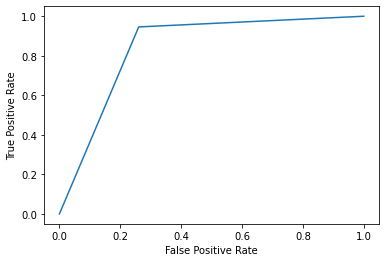

In [25]:
from matplotlib import pyplot as plt
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_new)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
accuracy = accuracy_score(y2, y_pred_new)*100
print("Accuracy in XGBoost classifier model:-", accuracy)
print("Confusion Matrix =", metrics.confusion_matrix(y2, y_pred_new, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y2, y_pred_new, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y2, y_pred_new, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y2, y_pred_new, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

print("F1 Score = ",f1_score(y2, y_pred_new, average='macro'))

Accuracy in XGBoost classifier model:- 85.31798085798961
Confusion Matrix = [[27360  9640]
 [ 2448 42884]]
Recall = 0.8531798085798961
Precision = 0.8620383013393625
Classification Report =
               precision    recall  f1-score   support

           0       0.92      0.74      0.82     37000
           1       0.82      0.95      0.88     45332

    accuracy                           0.85     82332
   macro avg       0.87      0.84      0.85     82332
weighted avg       0.86      0.85      0.85     82332

F1 Score =  0.8477675676160392


<AxesSubplot:>

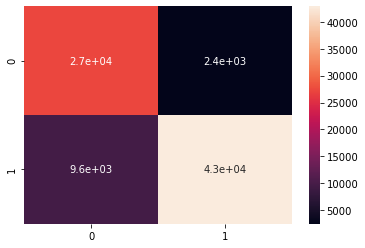

In [27]:
cm_xgb = metrics.confusion_matrix(y_pred_new, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_xgb, annot=True)

<AxesSubplot:>

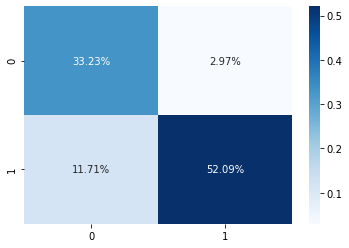

In [28]:
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot=True, 
            fmt='.2%', cmap='Blues')

In [29]:
# 3. DNN CLASSIFIER MODEL

from tensorflow import keras
model_DNN=keras.models.Sequential()
model_DNN.add(keras.layers.Dense(units=14, activation = "relu",input_shape = x1_encode.shape[1:]))
model_DNN.add(keras.layers.Dense(units=28,activation = "relu"))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=56,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=112,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=224,activation = "relu" ))
model_DNN.add(keras.layers.Dense(units=2, activation = "sigmoid"))
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 14)                210       
                                                                 
 dense_7 (Dense)             (None, 28)                420       
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 dense_8 (Dense)             (None, 56)                1624      
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense_9 (Dense)             (None, 112)               6384      
                                                                 
 dropout_2 (Dropout)         (None, 112)               0

In [30]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_DNN.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaDNNNetAE_new.h5",monitor='val_loss')
history = model_DNN.fit(x1_encode, y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [x2_encode, y2])
testloss,testaccuracy=model_DNN.evaluate(x2_encode,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
14918/14918 [==============================] - 60s 4ms/step - loss: 0.2805 - accuracy: 0.8910 - val_loss: 0.4683 - val_accuracy: 0.7927
Epoch 2/50
14918/14918 [==============================] - 56s 4ms/step - loss: 0.3235 - accuracy: 0.8894 - val_loss: 0.4645 - val_accuracy: 0.7978
Epoch 3/50
14918/14918 [==============================] - 54s 4ms/step - loss: 0.3328 - accuracy: 0.8875 - val_loss: 0.4755 - val_accuracy: 0.7871
Epoch 4/50
14918/14918 [==============================] - 55s 4ms/step - loss: 0.3049 - accuracy: 0.8917 - val_loss: 0.4724 - val_accuracy: 0.7866
Epoch 5/50
14918/14918 [==============================] - 55s 4ms/step - loss: 0.2846 - accuracy: 0.8975 - val_loss: 0.4497 - val_accuracy: 0.8097
Epoch 6/50
14918/14918 [==============================] - 56s 4ms/step - loss: 0.2797 - accuracy: 0.9028 - val_loss: 0.4914 - val_accuracy: 0.7866
Epoch 7/50
14918/14918 [==============================] - 56s 4ms/step - loss: 0.2974 - accuracy: 0.9003 - val_loss: 0

In [31]:
y_pred_DNN = model_DNN.predict(x2_encode)
print(y_pred_DNN)
y_pred_class_DNN=np.argmax(y_pred_DNN,axis=1)
print(y_pred_class_DNN)
print("Test Loss =",testloss)
print("Test Accuracy =",testaccuracy)

[[0.23396629 0.7658018 ]
 [0.23396629 0.7658018 ]
 [0.23396629 0.7658018 ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.23396629 0.7658018 ]]
[1 1 1 ... 0 0 1]
Test Loss = 0.4214584231376648
Test Accuracy = 0.8103410601615906


In [32]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_class_DNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.789014


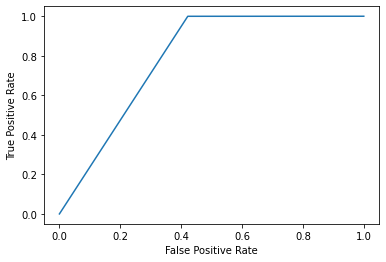

In [33]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_pred_class_DNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_DNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_DNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_DNN, y2, average='macro'))

Accuracy in DNN classifier model =  81.0341058154788
Confusion Matrix = [[21396    11]
 [15604 45321]]
Recall = 0.810341058154788
Precision = 0.8901672250012381
Classification Report =
               precision    recall  f1-score   support

           0       0.58      1.00      0.73     21407
           1       1.00      0.74      0.85     60925

    accuracy                           0.81     82332
   macro avg       0.79      0.87      0.79     82332
weighted avg       0.89      0.81      0.82     82332

F1 Score =  0.7928484420110534


<AxesSubplot:>

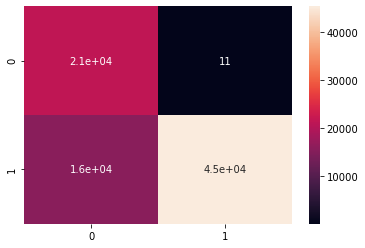

In [35]:
cm_DNN = metrics.confusion_matrix(y_pred_class_DNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_DNN, annot=True)

<AxesSubplot:>

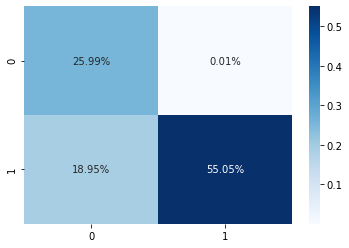

In [36]:
sns.heatmap(cm_DNN/np.sum(cm_DNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [37]:
# 4. CNN CLASSIFIER MODEL

x1_encode_CNN = np.reshape(x1_encode, (x1_encode.shape[0],x1_encode.shape[1],1))
x2_encode_CNN = np.reshape(x2_encode, (x2_encode.shape[0],x2_encode.shape[1],1))

In [38]:
from tensorflow import keras
from tensorflow.keras.layers import Input
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
convnet=keras.models.Sequential()
convnet.add(keras.layers.Convolution1D(14,3,activation="relu",input_shape=(14,1)))
convnet.add(keras.layers.Convolution1D(28,3,activation="relu"))
convnet.add(keras.layers.BatchNormalization())
convnet.add(keras.layers.MaxPooling1D(2,2))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Flatten())
convnet.add(keras.layers.Dense(56,activation="relu"))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Dense(2,activation="softmax"))
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 14)            56        
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 28)            1204      
                                                                 
 batch_normalization_4 (Batc  (None, 10, 28)           112       
 hNormalization)                                                 
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 28)            0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 5, 28)             0         
                                                                 
 flatten (Flatten)           (None, 140)              

In [39]:
opt = keras.optimizers.Adam(learning_rate=0.01)
convnet.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaConvNetAE_new.h5",monitor='val_loss')
history = convnet.fit(x1_encode_CNN,y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [x2_encode_CNN, y2])
testloss,testaccuracy=convnet.evaluate(x2_encode_CNN,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
14918/14918 [==============================] - 66s 4ms/step - loss: 0.1871 - accuracy: 0.9069 - val_loss: 0.2652 - val_accuracy: 0.8208
Epoch 2/50
14918/14918 [==============================] - 64s 4ms/step - loss: 0.1748 - accuracy: 0.9132 - val_loss: 0.2641 - val_accuracy: 0.8432
Epoch 3/50
14918/14918 [==============================] - 55s 4ms/step - loss: 0.1711 - accuracy: 0.9136 - val_loss: 0.3471 - val_accuracy: 0.8099
Epoch 4/50
14918/14918 [==============================] - 52s 3ms/step - loss: 0.1708 - accuracy: 0.9139 - val_loss: 0.2823 - val_accuracy: 0.8285
Epoch 5/50
14918/14918 [==============================] - 52s 3ms/step - loss: 0.1705 - accuracy: 0.9137 - val_loss: 0.2562 - val_accuracy: 0.8231
Epoch 6/50
14918/14918 [==============================] - 51s 3ms/step - loss: 0.1697 - accuracy: 0.9148 - val_loss: 0.2636 - val_accuracy: 0.8160
Epoch 7/50
14918/14918 [==============================] - 51s 3ms/step - loss: 0.1690 - accuracy: 0.9152 - val_loss: 0

In [40]:
y_pred_CNN = convnet.predict(x2_encode_CNN)
print(y_pred_CNN)
y_pred_class_CNN=np.argmax(y_pred_CNN,axis=1)
print(y_pred_class_CNN)

[[0.3622153  0.6377847 ]
 [0.42888045 0.5711196 ]
 [0.42888045 0.5711196 ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.26760307 0.73239696]]
[1 1 1 ... 0 0 1]


In [41]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_class_CNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.839229


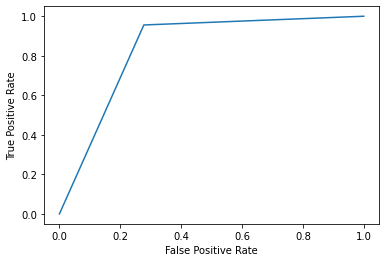

In [42]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_pred_class_CNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_CNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_CNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_CNN, y2, average='macro'))

Accuracy in CNN classifier model =  85.10299761939464
Confusion Matrix = [[26737  2002]
 [10263 43330]]
Recall = 0.8510299761939465
Precision = 0.8744302545209995
Classification Report =
               precision    recall  f1-score   support

           0       0.72      0.93      0.81     28739
           1       0.96      0.81      0.88     53593

    accuracy                           0.85     82332
   macro avg       0.84      0.87      0.84     82332
weighted avg       0.87      0.85      0.85     82332

F1 Score =  0.8447230236796579


<AxesSubplot:>

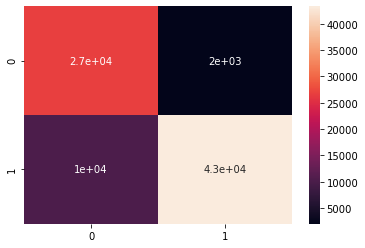

In [44]:
cm_CNN = metrics.confusion_matrix(y_pred_class_CNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_CNN, annot=True)

<AxesSubplot:>

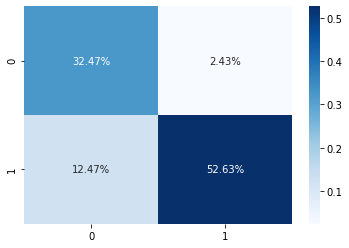

In [45]:
sns.heatmap(cm_CNN/np.sum(cm_CNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [46]:
# 5. TCN CLASSIFIER MODEL

print(x1_encode.shape[0])
print(x2_encode.shape[0])

238682
82332


In [47]:
print(x1_encode.shape, y1.shape, x2_encode.shape, y2.shape)
x1_encode_TCN = np.reshape(x1_encode, (x1_encode.shape[0],x1_encode.shape[1],1))
x2_encode_TCN = np.reshape(x2_encode, (x2_encode.shape[0],x2_encode.shape[1],1))
print(x1_encode_TCN.shape, y1.shape, x2_encode_TCN.shape, y2.shape)

(238682, 14) (238682,) (82332, 14) (82332,)
(238682, 14, 1) (238682,) (82332, 14, 1) (82332,)


In [48]:
from tensorflow.keras.utils import to_categorical
num_classes = 2
y1_TCN = to_categorical(y1, num_classes)
y2_TCN = to_categorical(y2, num_classes)
print(x1_encode_TCN.shape, y1_TCN.shape, x2_encode_TCN.shape, y2_TCN.shape)

(238682, 14, 1) (238682, 2) (82332, 14, 1) (82332, 2)


In [49]:
y1_TCN = np.expand_dims(y1_TCN, axis=2)
y2_TCN = np.expand_dims(y2_TCN, axis=2)
print(x1_encode_TCN.shape, y1_TCN.shape, x2_encode_TCN.shape, y2_TCN.shape)

(238682, 14, 1) (238682, 2, 1) (82332, 14, 1) (82332, 2, 1)


In [50]:
!pip install keras-tcn

In [51]:
import numpy as np
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tcn import compiled_tcn

In [52]:
model_TCN = compiled_tcn(return_sequences = False,num_feat = 1, num_classes = 2, nb_filters = 64,kernel_size=6,
                    dilations=[1,2,4,8,16,32,64],nb_stacks=1, opt='adam',lr=0.002,activation = 'relu',kernel_initializer = 
                    'he_normal',use_batch_norm=True,use_layer_norm = False,use_weight_norm = False,
                     max_len=x1_encode_TCN[0:1].shape[1],use_skip_connections=True) 

x.shape= (None, 64)
model.x = (None, 14, 1)
model.y = (None, 2)


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [53]:
print(x1_encode_TCN[0:1].shape[1])

14


In [54]:
print(f'x_train.shape = {x1_encode_TCN.shape}')
print(f'y_train.shape = {y1_TCN.shape}')
print(f'x_test.shape = {x2_encode_TCN.shape}')
print(f'y_test.shape = {y2_TCN.shape}')

x_train.shape = (238682, 14, 1)
y_train.shape = (238682, 2, 1)
x_test.shape = (82332, 14, 1)
y_test.shape = (82332, 2, 1)


In [55]:
model_TCN.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 14, 1)]           0         
                                                                 
 tcn (TCN)                   (None, 64)                324480    
                                                                 
 dense_14 (Dense)            (None, 2)                 130       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 324,610
Trainable params: 322,818
Non-trainable params: 1,792
_________________________________________________________________


In [56]:
y1_TCN = y1_TCN.squeeze().argmax(axis=1)
y2_TCN = y2_TCN.squeeze().argmax(axis=1)

In [57]:
history = model_TCN.fit(x1_encode_TCN, y1_TCN, epochs = 10, validation_data = [x2_encode_TCN, y2_TCN], 
                    workers=4, use_multiprocessing=True)

Epoch 1/10
7459/7459 [==============================] - 939s 123ms/step - loss: 0.1538 - accuracy: 0.9240 - val_loss: 0.2679 - val_accuracy: 0.8583
Epoch 2/10
7459/7459 [==============================] - 854s 114ms/step - loss: 0.1366 - accuracy: 0.9311 - val_loss: 0.2561 - val_accuracy: 0.8674
Epoch 3/10
7459/7459 [==============================] - 892s 120ms/step - loss: 0.1320 - accuracy: 0.9334 - val_loss: 0.2680 - val_accuracy: 0.8610
Epoch 4/10
7459/7459 [==============================] - 796s 107ms/step - loss: 0.1298 - accuracy: 0.9340 - val_loss: 0.2926 - val_accuracy: 0.8488
Epoch 5/10
7459/7459 [==============================] - 882s 118ms/step - loss: 0.1279 - accuracy: 0.9356 - val_loss: 0.2470 - val_accuracy: 0.8737
Epoch 6/10
7459/7459 [==============================] - 891s 119ms/step - loss: 0.1269 - accuracy: 0.9360 - val_loss: 0.2445 - val_accuracy: 0.8782
Epoch 7/10
7459/7459 [==============================] - 863s 116ms/step - loss: 0.1255 - accuracy: 0.9366 - val_

In [58]:
result = model_TCN.evaluate(x2_encode_TCN, y2_TCN)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")

2573/2573 [==============================] - 84s 33ms/step - loss: 0.2310 - accuracy: 0.8906
Accuracy : 89.06 %
Loss : 23.10 %


In [59]:
y_pred_TCN = model_TCN.predict(x2_encode_TCN, verbose=0)
print(np.argmax(y_pred_TCN, axis=1))
y_pred_class_TCN=np.argmax(y_pred_TCN,axis=1)
print(y_pred_class_TCN)

[1 1 1 ... 0 0 1]
[1 1 1 ... 0 0 1]


In [60]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_TCN, y_pred_class_TCN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.884809


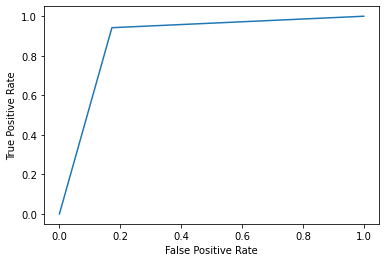

In [61]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [62]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_TCN, y2_TCN, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_TCN, y2_TCN, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_TCN, y2_TCN, average='macro'))

Accuracy in TCN classifier model =  89.06014672302386
Confusion Matrix = [[30620  2627]
 [ 6380 42705]]
Recall = 0.8906014672302386
Precision = 0.8958199933361682
Classification Report =
               precision    recall  f1-score   support

           0       0.83      0.92      0.87     33247
           1       0.94      0.87      0.90     49085

    accuracy                           0.89     82332
   macro avg       0.88      0.90      0.89     82332
weighted avg       0.90      0.89      0.89     82332

F1 Score =  0.8881925225436026


<AxesSubplot:>

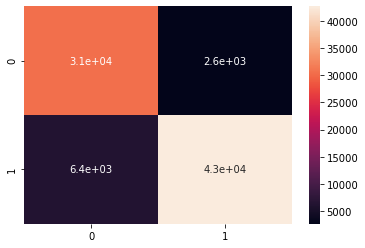

In [63]:
cm_TCN = metrics.confusion_matrix(y_pred_class_TCN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TCN, annot=True)

<AxesSubplot:>

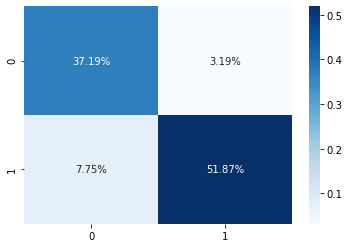

In [64]:
sns.heatmap(cm_TCN/np.sum(cm_TCN), annot=True, 
            fmt='.2%', cmap='Blues')

In [65]:
# 6. TabNet CLASSIFIER MODEL

print("X train shape: ", x1_recon.shape)
print("X test shape: ", x2_recon.shape)
print("Y train shape: ", y1.shape)
print("Y test shape: ", y2.shape)

X train shape:  (238682, 14)
X test shape:  (82332, 14)
Y train shape:  (238682,)
Y test shape:  (82332,)


In [66]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [95]:
# define the model
model_TabNet = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10,"gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax')

Device used : cpu


In [77]:
# fit the model 
model_TabNet.fit(x1_encode,y1, eval_set=[(x1_encode, y1), (x2_encode, y2)],eval_name=['train', 'valid'],
                   eval_metric=['auc','accuracy'],max_epochs=20 , patience=50, batch_size=256, virtual_batch_size=128, 
                   num_workers=0, weights=1,drop_last=False)   

epoch 0  | loss: 0.16583 | train_auc: 0.98655 | train_accuracy: 0.92806 | valid_auc: 0.95736 | valid_accuracy: 0.84289 |  0:01:04s
epoch 1  | loss: 0.14436 | train_auc: 0.98769 | train_accuracy: 0.93183 | valid_auc: 0.93235 | valid_accuracy: 0.81983 |  0:03:08s
epoch 2  | loss: 0.13923 | train_auc: 0.9879  | train_accuracy: 0.93139 | valid_auc: 0.9548  | valid_accuracy: 0.84894 |  0:04:59s
epoch 3  | loss: 0.13799 | train_auc: 0.9886  | train_accuracy: 0.93028 | valid_auc: 0.9619  | valid_accuracy: 0.88003 |  0:06:57s
epoch 4  | loss: 0.13527 | train_auc: 0.9889  | train_accuracy: 0.9334  | valid_auc: 0.96291 | valid_accuracy: 0.88005 |  0:08:52s
epoch 5  | loss: 0.13463 | train_auc: 0.98472 | train_accuracy: 0.93129 | valid_auc: 0.95587 | valid_accuracy: 0.85172 |  0:11:03s
epoch 6  | loss: 0.1335  | train_auc: 0.98911 | train_accuracy: 0.93641 | valid_auc: 0.96106 | valid_accuracy: 0.8676  |  0:13:42s
epoch 7  | loss: 0.13233 | train_auc: 0.98906 | train_accuracy: 0.93029 | valid_auc

Text(0, 0.5, 'Feature index')

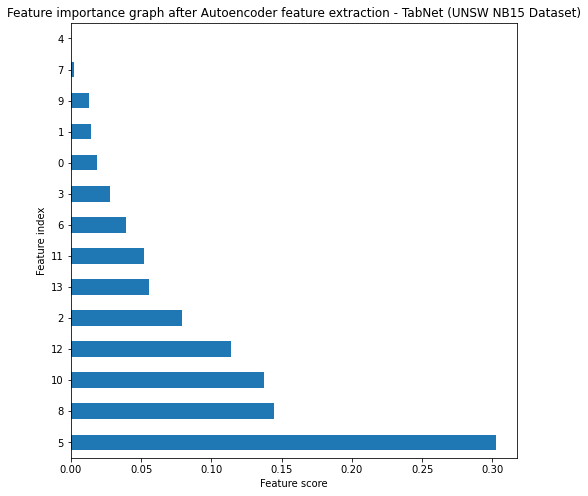

In [78]:
# find and plot feature importance 
from IPython.core.pylabtools import figsize
figsize(8, 8)
model_TabNet.feature_importances_
feat_importances = pd.Series(model_TabNet.feature_importances_)
feat_importances.nlargest(14).plot(kind='barh')
plt.title("Feature importance graph after Autoencoder feature extraction - TabNet (UNSW NB15 Dataset)")
plt.xlabel("Feature score")
plt.ylabel("Feature index")

In [79]:
y_pred_TabNet = model_TabNet.predict(x2_encode)
print(y_pred_TabNet)

[1 1 0 ... 0 0 1]


In [80]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_TabNet)
print('ROC AUC: %f' % auc)

ROC AUC: 0.890947


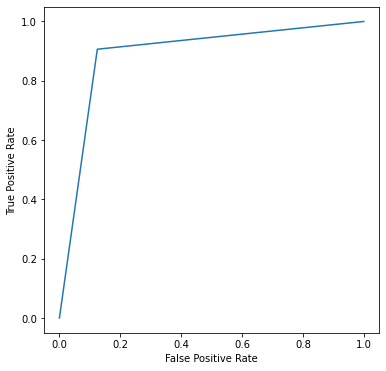

In [87]:
from IPython.core.pylabtools import figsize
figsize(6, 6)
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
test_acc = accuracy_score(y_pred_TabNet, y2)
print("Accuracy in TabNet classifier model:",test_acc*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_TabNet, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_TabNet, y2, average='macro'))

Accuracy in TabNet classifier model: 89.25083807025214
Confusion Matrix = [[32394  4244]
 [ 4606 41088]]
Recall = 0.8925083807025215
Precision = 0.892644093707075
Classification Report =
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     36638
           1       0.91      0.90      0.90     45694

    accuracy                           0.89     82332
   macro avg       0.89      0.89      0.89     82332
weighted avg       0.89      0.89      0.89     82332

F1 Score =  0.8912962584235471


<AxesSubplot:>

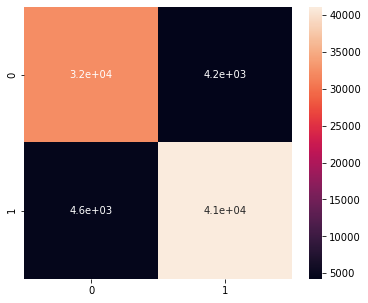

In [89]:
from IPython.core.pylabtools import figsize
figsize(6, 5)
cm_TabNet = metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TabNet, annot=True)

<AxesSubplot:>

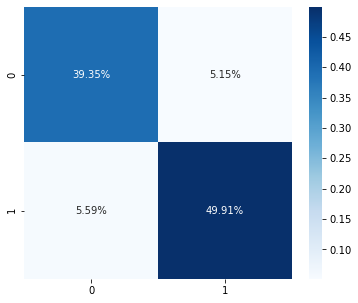

In [90]:
from IPython.core.pylabtools import figsize
figsize(6, 5)
sns.heatmap(cm_TabNet/np.sum(cm_TabNet), annot=True, 
            fmt='.2%', cmap='Blues')

In [85]:
print("Number of selected features=%d" % (x1_encode[0:1].shape[1]))
print('Accuracy result of all models:')
print("Accuracy in XGBoost classifier model:-", accuracy)
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_pred_class_DNN, y2)*100)
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_pred_class_CNN, y2)*100)
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Accuracy in TabNet classifier model:",test_acc*100)

Number of selected features=14
Accuracy result of all models:
Accuracy in XGBoost classifier model:- 85.31798085798961
Accuracy in DNN classifier model =  81.0341058154788
Accuracy in CNN classifier model =  85.10299761939464
Accuracy in TCN classifier model =  89.06014672302386
Accuracy in TabNet classifier model: 89.25083807025214


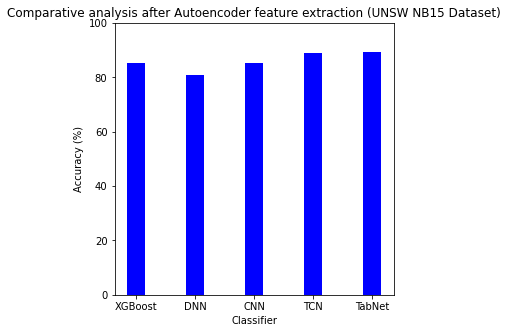

In [110]:
data = {'XGBoost':85.32, 'DNN':81.03, 'CNN':85.10,
        'TCN':89.06, 'TabNet':89.25}
Classifier_model = list(data.keys())
Classifier_accuracy = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Classifier_model, Classifier_accuracy, color ='blue',
        width = 0.3)
plt.ylim(0, 100)
plt.xlabel("Classifier")
plt.ylabel("Accuracy (%)")
plt.title("Comparative analysis after Autoencoder feature extraction (UNSW NB15 Dataset)")
plt.show()

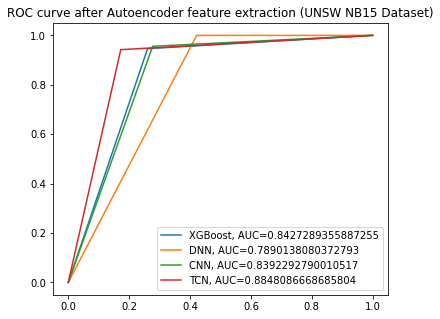

In [93]:
#set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_new)
auc = roc_auc_score(y2, y_pred_new)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
auc = roc_auc_score(y2, y_pred_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
auc = roc_auc_score(y2, y_pred_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

#add legend
plt.title("ROC curve after Autoencoder feature extraction (UNSW NB15 Dataset)")
plt.legend()

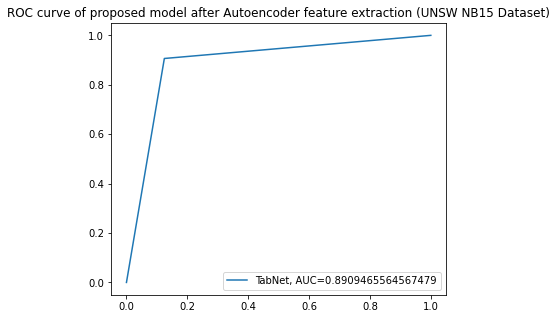

In [94]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))
#add legend
plt.title("ROC curve of proposed model after Autoencoder feature extraction (UNSW NB15 Dataset)")
plt.legend()

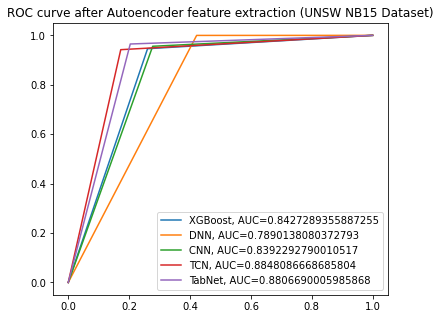

In [114]:
#set up plotting area
plt.figure(0).clf()
figsize(5, 4)

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_new)
auc = roc_auc_score(y2, y_pred_new)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
auc = roc_auc_score(y2, y_pred_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
auc = roc_auc_score(y2, y_pred_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))

#add legend
plt.title("ROC curve after Autoencoder feature extraction (UNSW NB15 Dataset)")
plt.legend()

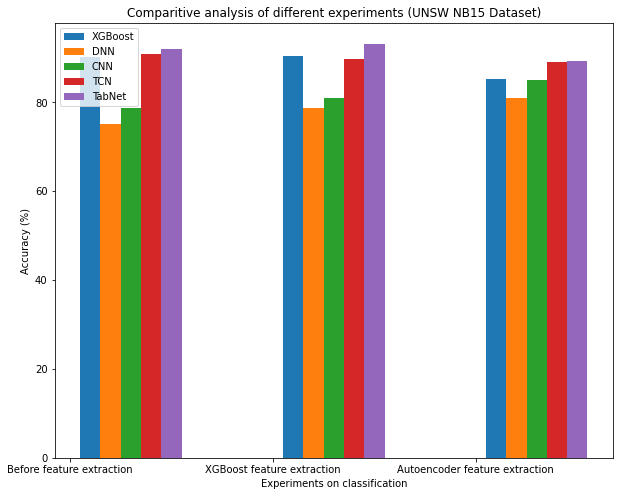

In [111]:
from IPython.core.pylabtools import figsize
figsize(10, 8)
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Before feature extraction','XGBoost feature extraction','Autoencoder feature extraction']
xvals = [90.1,90.5,85.32]
yvals = [75.1,78.7,81.03]
zvals = [78.7,80.9,85.10]
avals = [90.9,89.7,89.06]
bvals = [92.1,93.2,89.25]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.1, label = 'XGBoost')
plt.bar(x_axis +0.1*2, yvals, width=0.1, label = 'DNN')
plt.bar(x_axis +0.1*3, zvals, width=0.1, label = 'CNN')
plt.bar(x_axis +0.1*4, avals, width=0.1, label = 'TCN')
plt.bar(x_axis +0.1*5, bvals, width=0.1, label = 'TabNet')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification")
plt.title("Comparitive analysis of different experiments (UNSW NB15 Dataset)")
plt.legend()
plt.show()